# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import analysis_util

# Data

In [3]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}
df_comment_post_dict = {}


for subreddit in subreddits:
    print(subreddit)
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"
    path_awards = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv"
    path_awards_comments = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards_comments.csv"
    
    df_comments=analysis_util.read_comments(path_comment,path_awards_comments)
    df_post=analysis_util.read_posts(path_post,path_awards)
    df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)    
    G=analysis_util.get_graph(df_post,df_comments,df_all_nodes)
    G_big=analysis_util.get_biggest_component(G)    
    df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
    df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_post,df_comment_post)
    
    df_comment_post_dict[subreddit] = df_comment_post
    df_comment_dict[subreddit] = df_comments
    df_post_dict[subreddit] = df_post
    df_all_nodes_dict[subreddit] = df_all_nodes
    G_dict[subreddit] = G_big
    df_authors_dict[subreddit] = df_authors
    print('')

for subreddit in subreddits:
    df_authors_dict[subreddit]['sum_awards'] = df_authors_dict[subreddit]['sum_awards'].astype(int)
    df_authors_dict[subreddit]['award'] = df_authors_dict[subreddit]['sum_awards'] > 0

    df_comment_dict[subreddit]['n_awards'] = df_comment_dict[subreddit]['n_awards'].astype(int)
    df_comment_dict[subreddit]['award'] = df_comment_dict[subreddit]['n_awards'] > 0

    df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].fillna(0)
    df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].astype(int)
    df_post_dict[subreddit]['award'] = df_post_dict[subreddit]['n_awards'] > 0

FourSentenceStories
Removed 0.008264462809917328 of the rows

Trump666
Removed 0.023008849557522026 of the rows

GraphTheory
Removed 0.046391752577319645 of the rows

jazznoir
Removed 0.056192660550458795 of the rows

indoorbouldering
Removed 0.013580246913580174 of the rows

kiwi_bird
Removed 0.01412429378531077 of the rows

DTU
Removed 0.02263374485596703 of the rows



# PLOTS

In [32]:
color_map = []
for node in G_big:
    if type(node) == float: print(node)
    if G_big.nodes[node]['type'] == 'both': color_map.append('green')
    elif G_big.nodes[node]['type'] == 'commenter': color_map.append('red')
    else: color_map.append('blue')

widths = [G_big[u][v]['weight'] for u,v in G_big.edges()]

In [89]:
df_authors.mean_score
node_sizes = []
for node in G_big:
    if np.isnan(df_authors.mean_score[node]):
        node_sizes.append(8)
    else:
        node_sizes.append(df_authors.mean_score[node]*3.8)

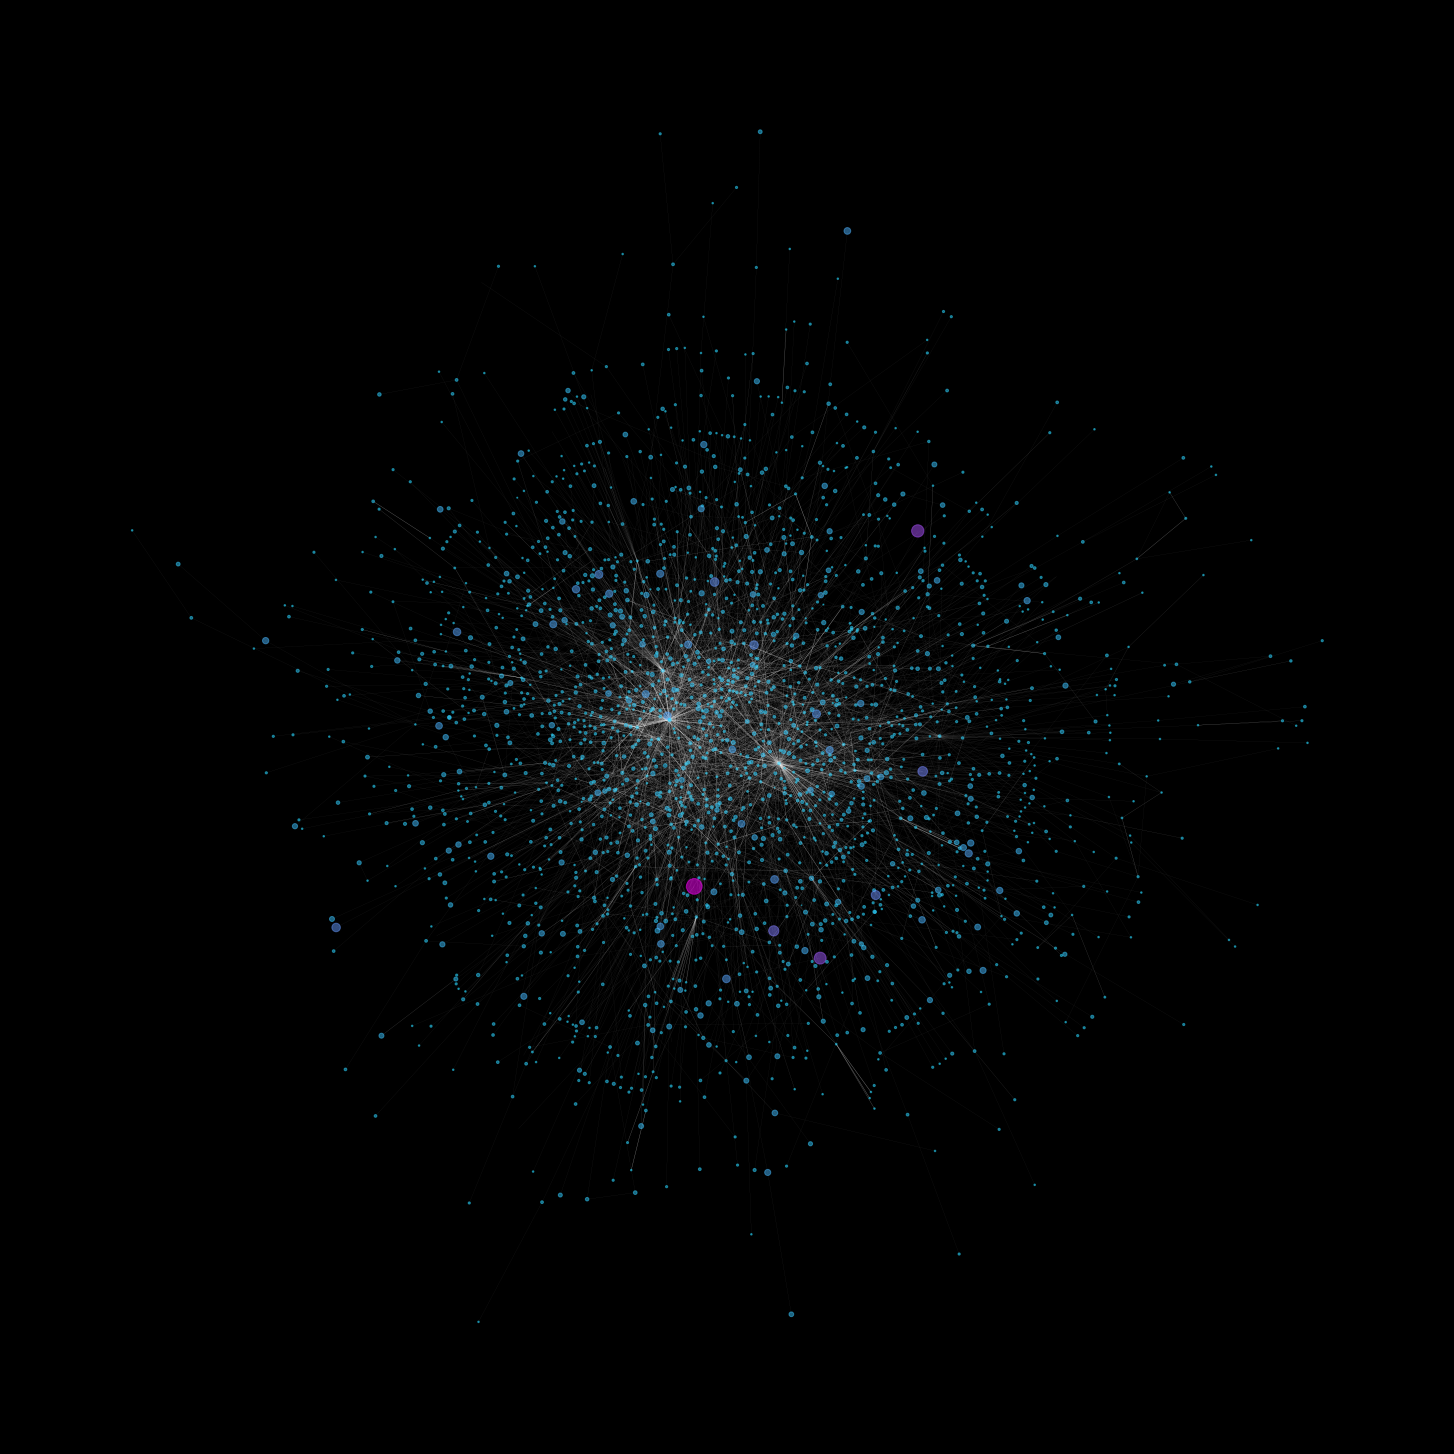

In [78]:
# make cmap
cmap = plt.cm.get_cmap('cool')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,20))

pos = nx.spring_layout(G_big, 
    k=0.08, 
    iterations=50)

nx.draw(G_big, 
    node_color=colors,
    edge_color='white',
    with_labels=False,
    pos=pos,
    node_size=node_sizes,
    alpha=0.5,
    width=0.05*np.array(widths),)

fig.set_facecolor("black")
plt.show()

/home/pelle/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


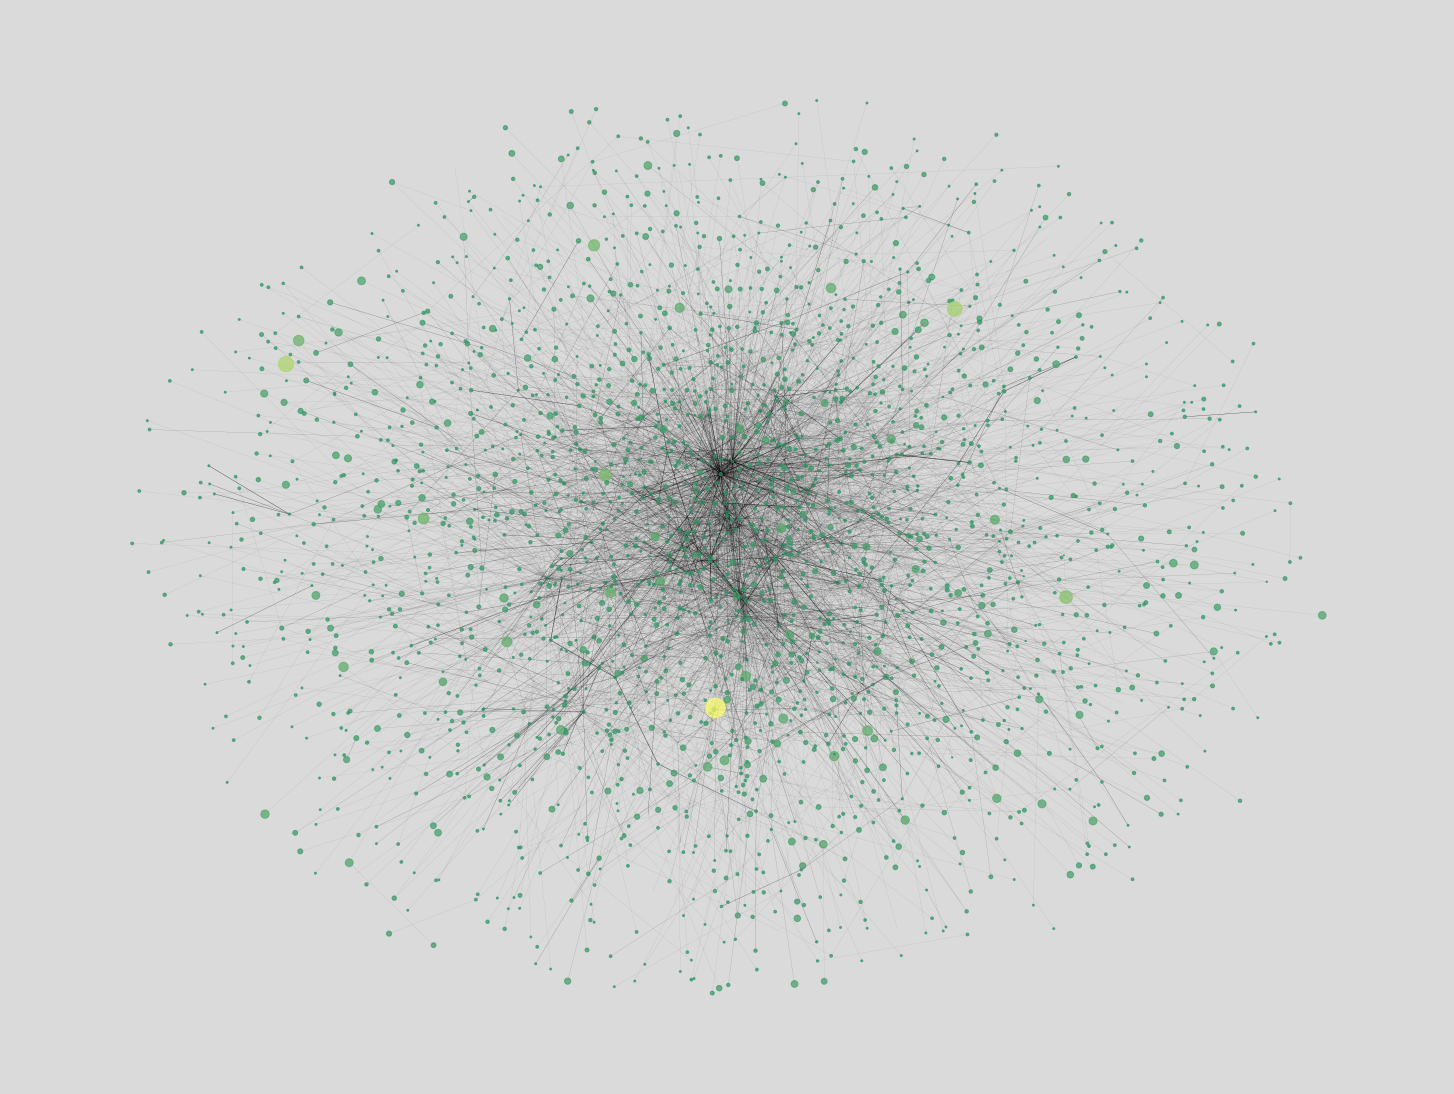

<module 'matplotlib.pyplot' from '/home/pelle/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [90]:
# make cmap
cmap = plt.cm.get_cmap('summer')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,15))

pos = nx.spring_layout(G_big, 
    k=0.15, 
    iterations=50)

nx.draw(G_big, 
    node_color=colors,
    edge_color='black',
    with_labels=False,
    pos=pos,
    node_size=node_sizes,
    alpha=0.7,
    width=0.05*np.array(widths),)

fig.set_facecolor([0.8549,0.8549,0.8549])

plt.show()
plt

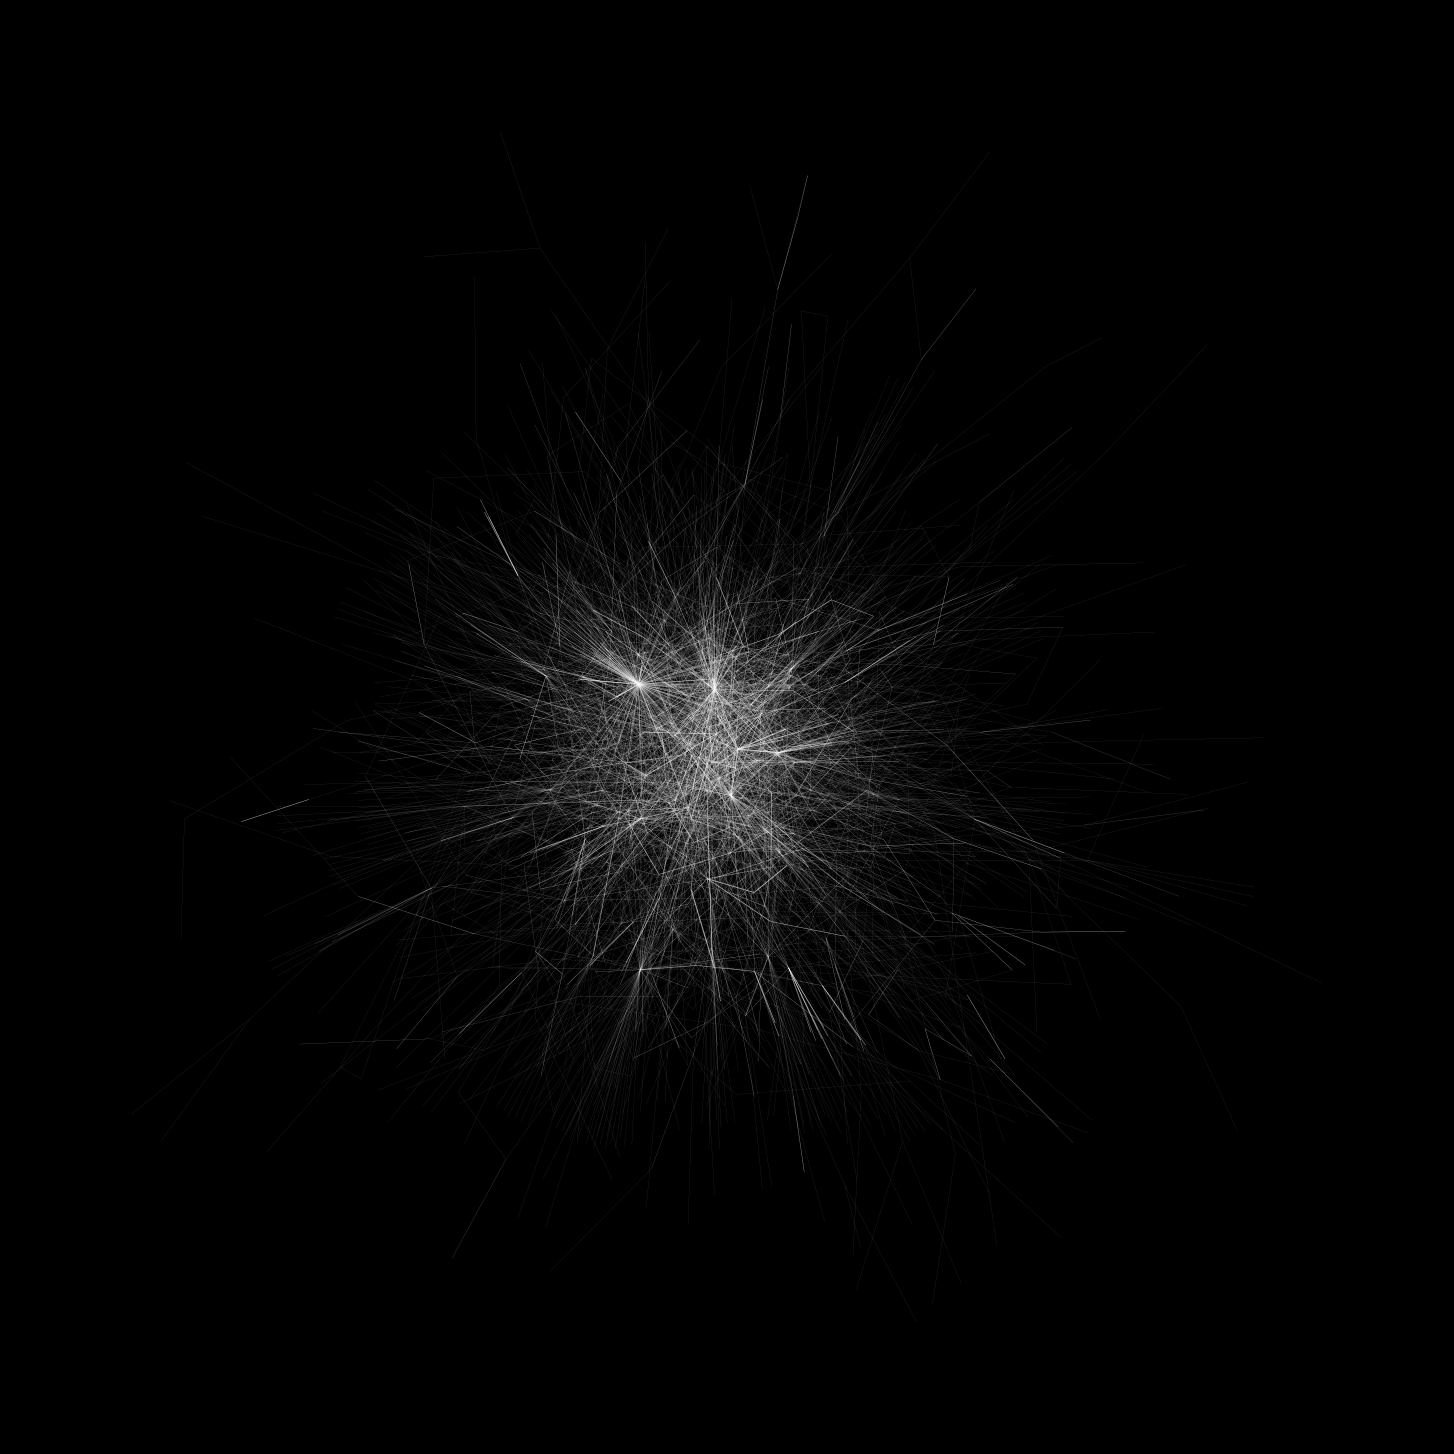

In [80]:
# make cmap
cmap = plt.cm.get_cmap('summer')

#map node sizes to cmap
norm = plt.Normalize(min(node_sizes), max(node_sizes))
colors = [cmap(norm(value)) for value in node_sizes]

fig=plt.figure(figsize=(20,20))

pos = nx.spring_layout(G_big, 
    k=0.08, 
    iterations=50)

nx.draw(G_big, 
    node_color='white',
    edge_color='white',
    with_labels=False,
    pos=pos,
    node_size=0,
    alpha=0.6,
    width=0.08*np.array(widths),)

fig.set_facecolor("black")
plt.show()

# ALL networks

In [147]:
def plot_G(sub, c,s,w,a):
    plt.figure(figsize=(12,12))
    # color_map = []
    # for node in G_dict[sub]:
    #     if type(node) == float: print(node)
    #     if G_dict[sub].nodes[node]['type'] == 'both': color_map.append('green')
    #     elif G_dict[sub].nodes[node]['type'] == 'commenter': color_map.append('red')
    #     else: color_map.append('blue')
    s = len(G_dict[sub])*-0.03595226676061454+89.65811895967292+10
    nx.draw(G_dict[sub], 
            node_color=c, 
            with_labels=False, 
            pos=nx.spring_layout(G_dict[sub], k=0.15, iterations=20), 
            node_size=s,
            width=w,
            alpha=a
            )

#     plt.title(sub)
    p = '/home/pelle/Master_Thesis/reports/figures/'
    plt.savefig(p+'graphs/'+sub+'.png', dpi=300, bbox_inches='tight')
    # plt.show()

In [141]:
color_dict = {'FourSentenceStories':'#FF0000',
                'Trump666':'#FFA500',
                'GraphTheory':'#FF1493',
                'jazznoir':'#008000',
                'indoorbouldering':'#0000FF',
                'kiwi_bird':'#800080',
                'DTU':'#FFD700'}

size_dict = {'FourSentenceStories':100,
                'Trump666':60,
                'GraphTheory':95,
                'jazznoir':50,
                'indoorbouldering':10,
                'kiwi_bird':80,
                'DTU':60}

slope:  -0.03595226676061454
intercept:  89.65811895967292


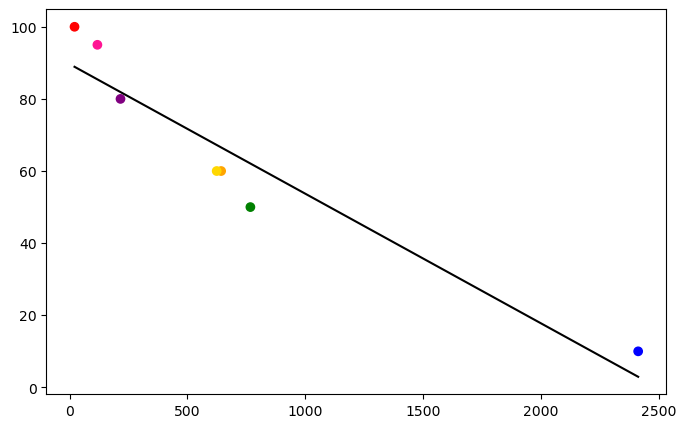

In [135]:
# plot scatter plot with size_dict and N_nodes 
plt.figure(figsize=(8,5))
plt.scatter(y=[size_dict[sub] for sub in size_dict], x=[G_dict[sub].number_of_nodes() for sub in size_dict], color=[color_dict[sub] for sub in size_dict])
# plot reg line
plt.plot(np.unique([G_dict[sub].number_of_nodes() for sub in size_dict]), np.poly1d(np.polyfit([G_dict[sub].number_of_nodes() for sub in size_dict], [size_dict[sub] for sub in size_dict], 1))(np.unique([G_dict[sub].number_of_nodes() for sub in size_dict])), color='black')

# get reg line
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress([G_dict[sub].number_of_nodes() for sub in size_dict], [size_dict[sub] for sub in size_dict])
print('slope: ', slope)
print('intercept: ', intercept)

Ez


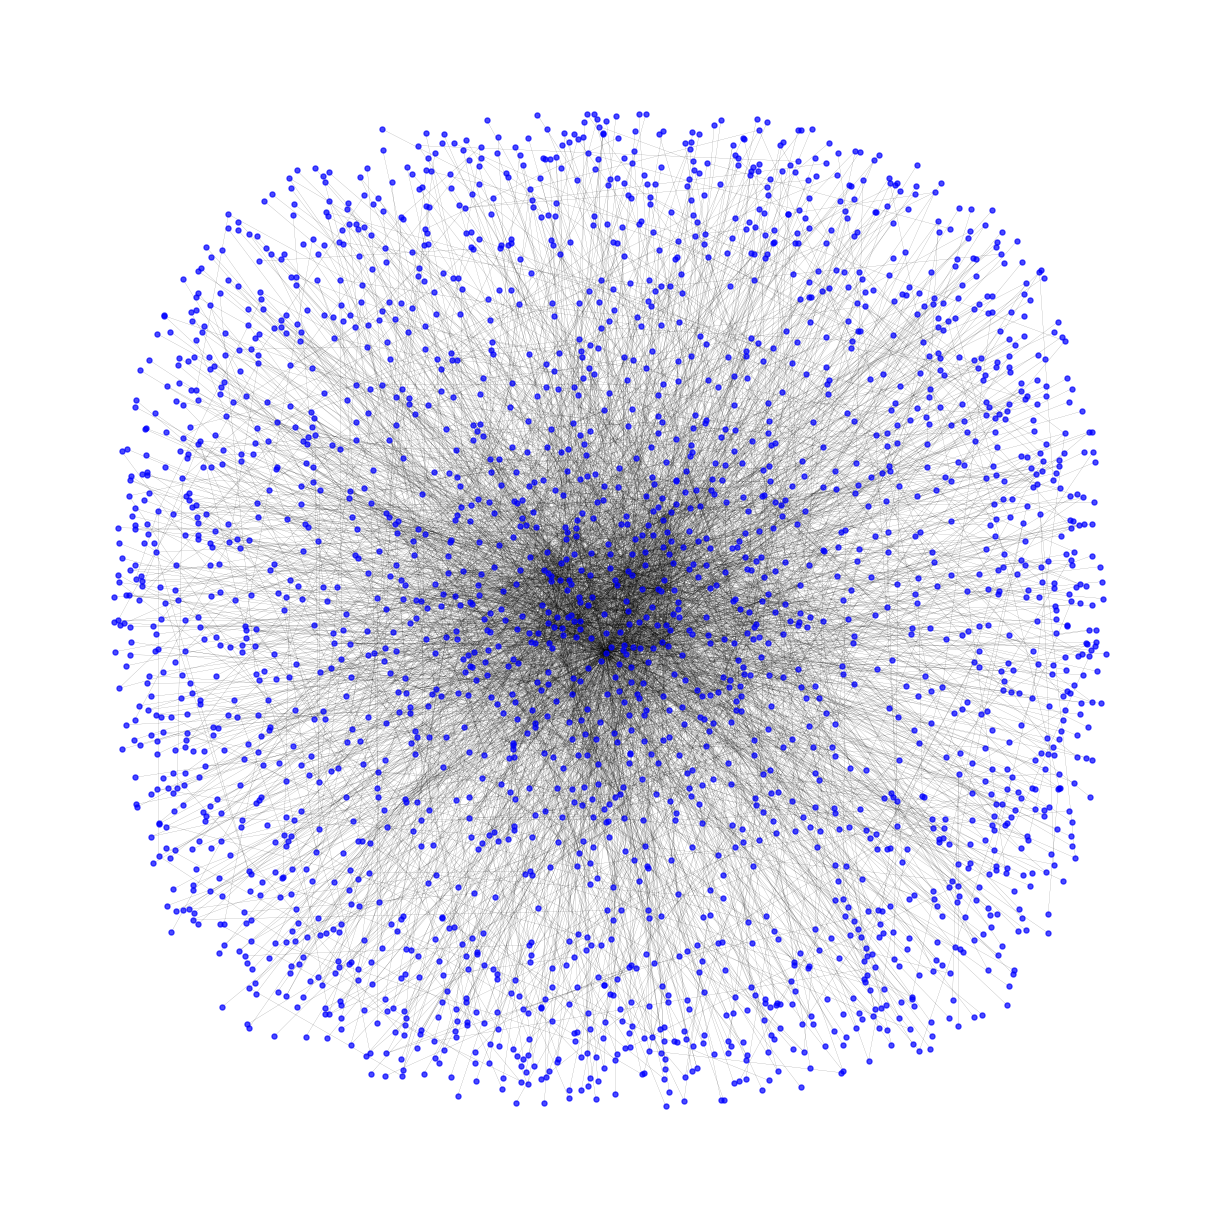

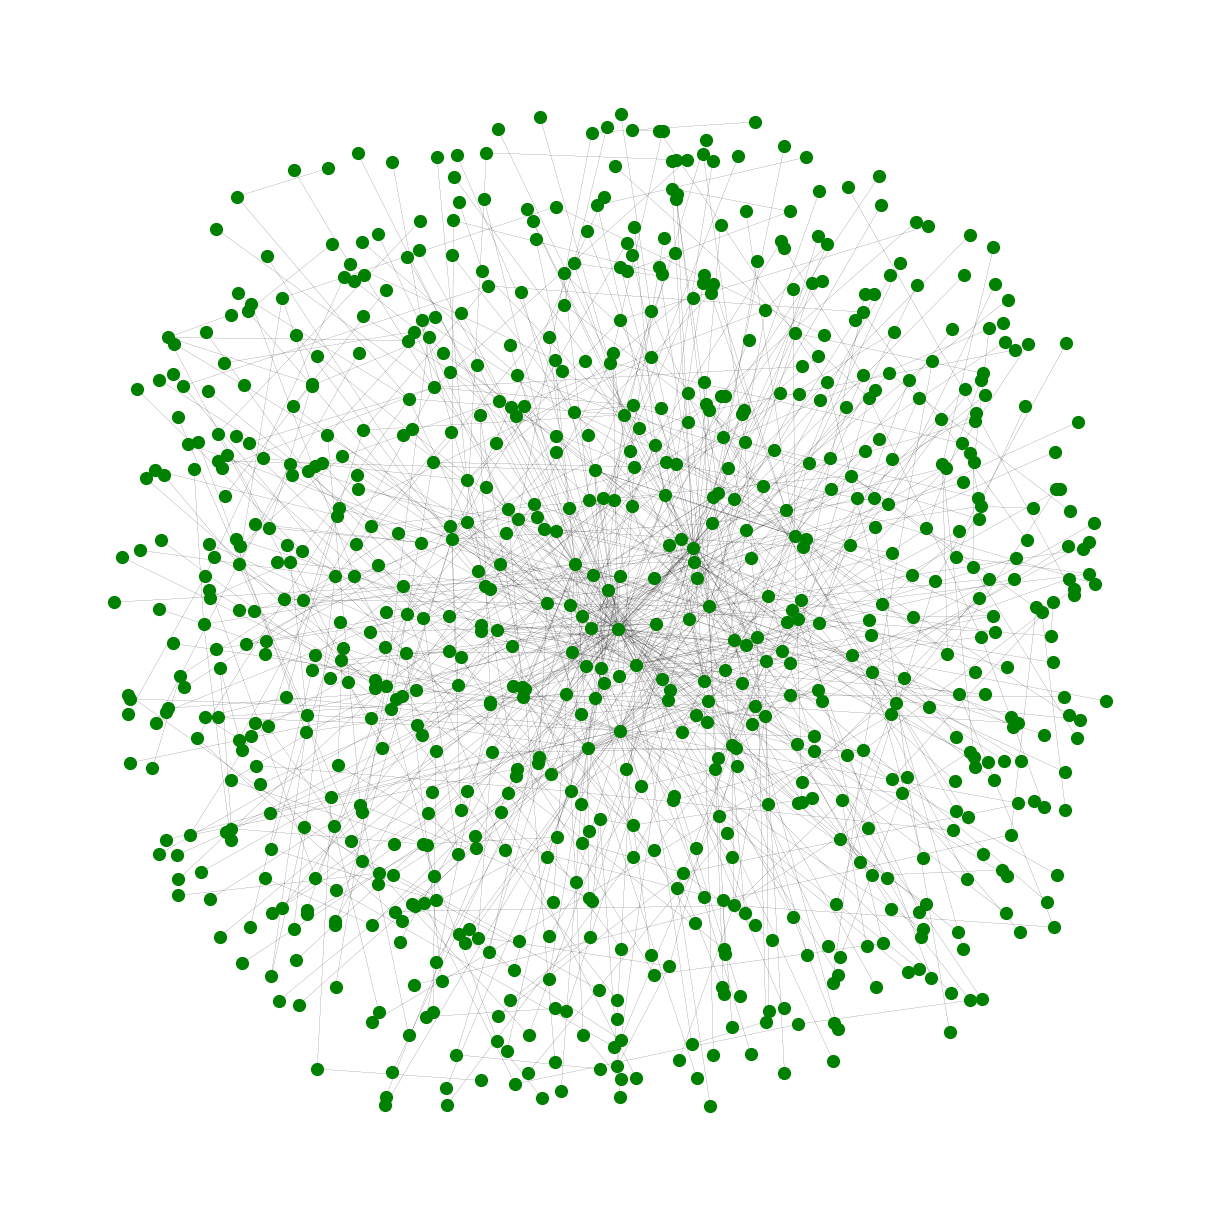

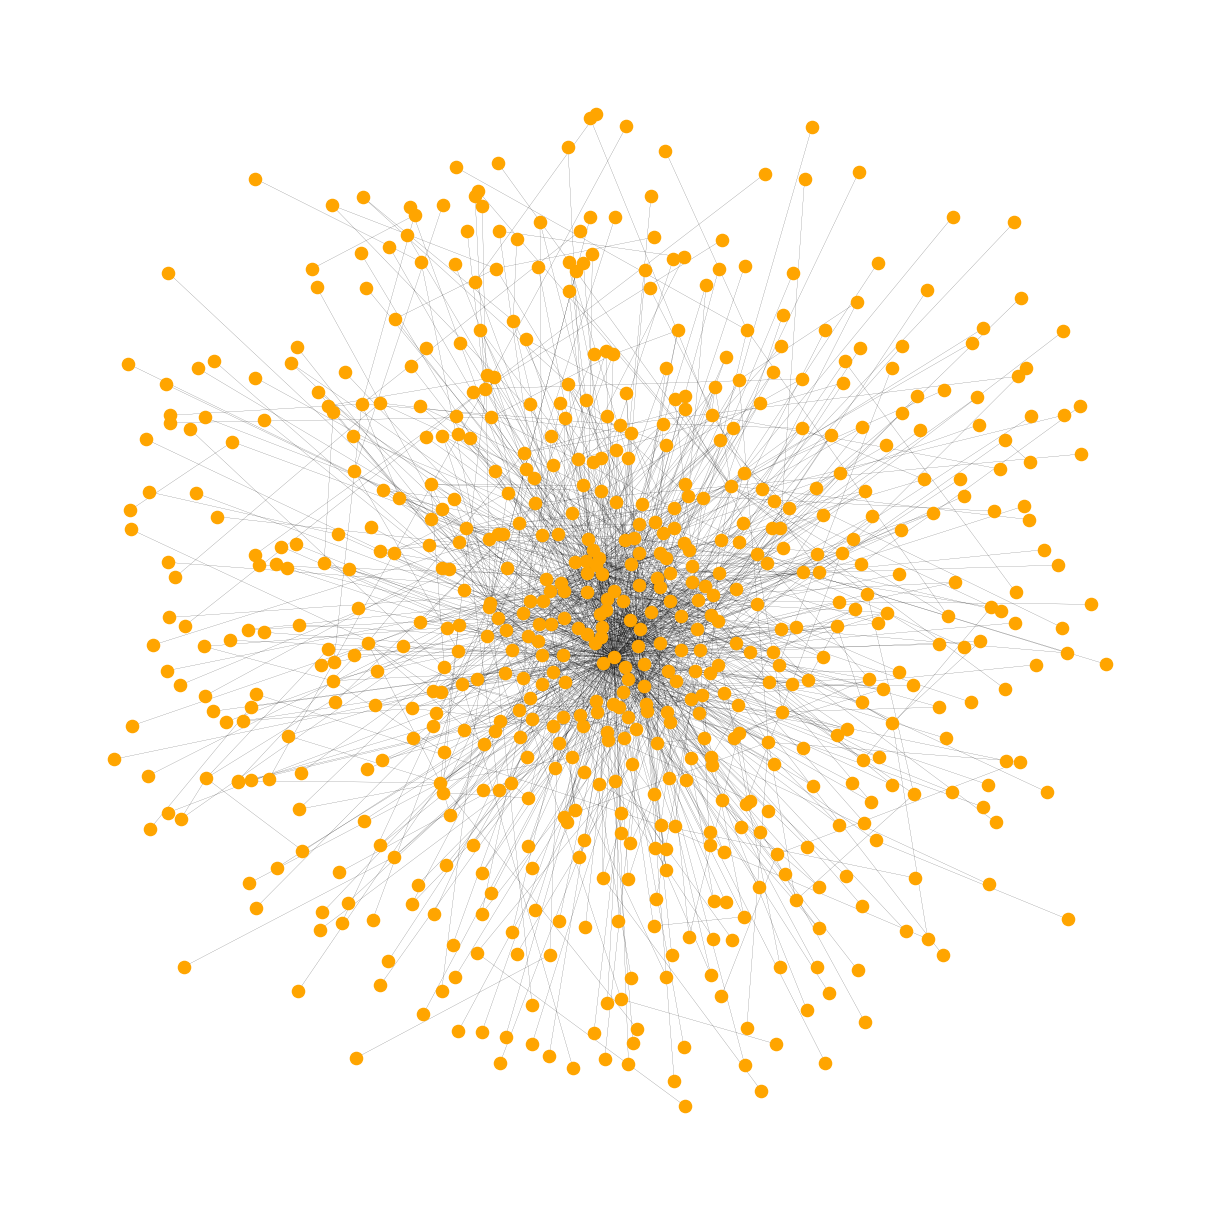

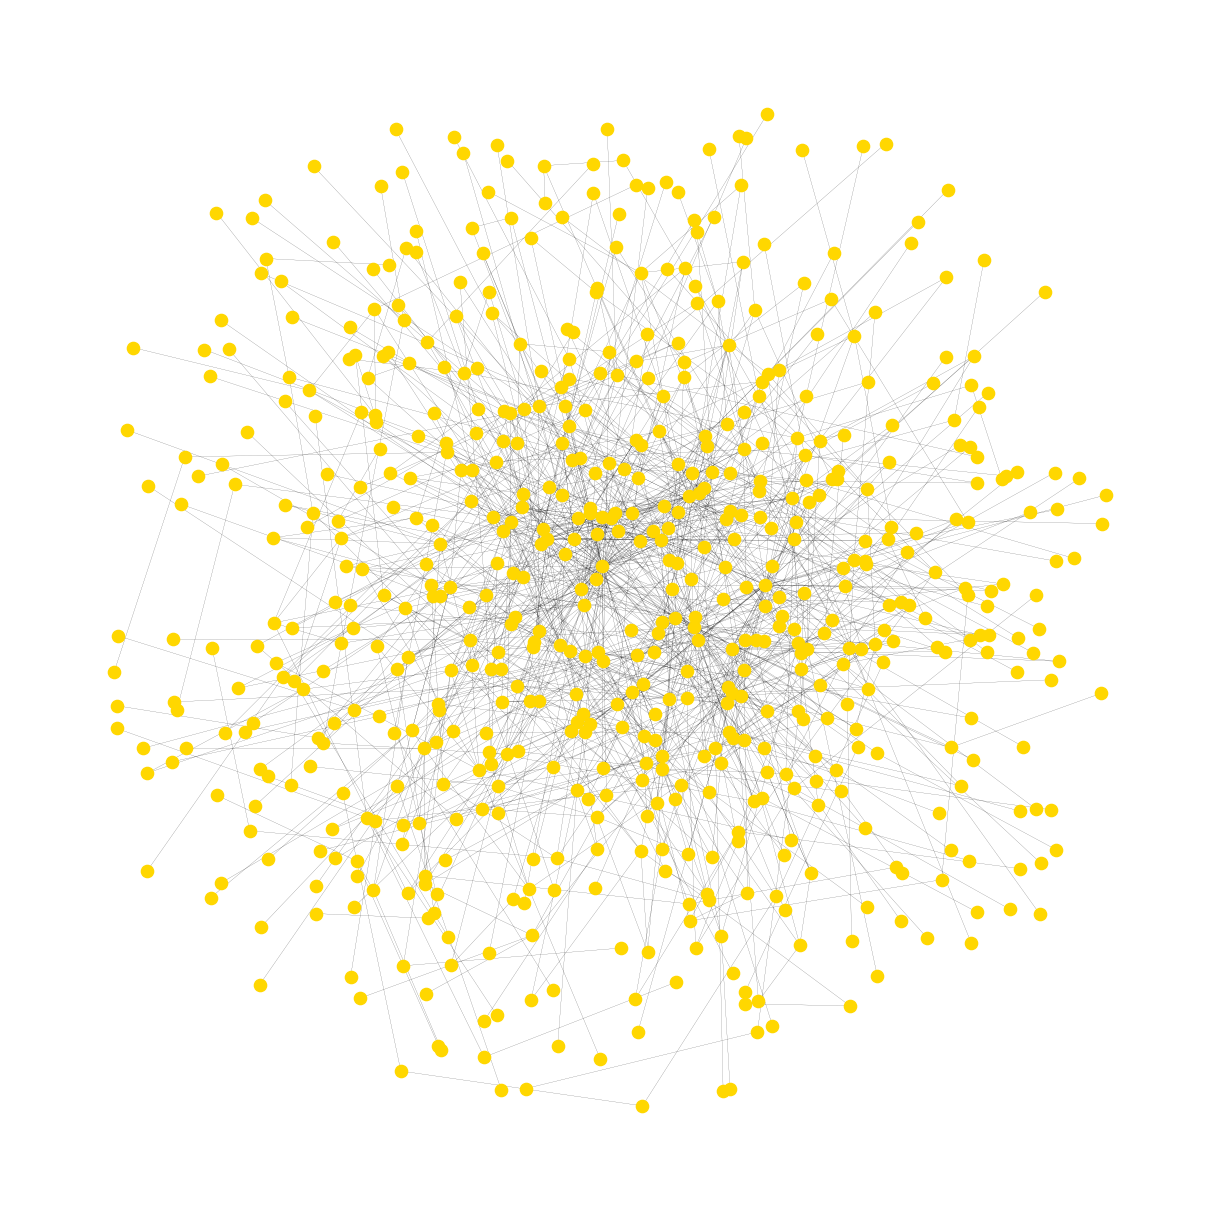

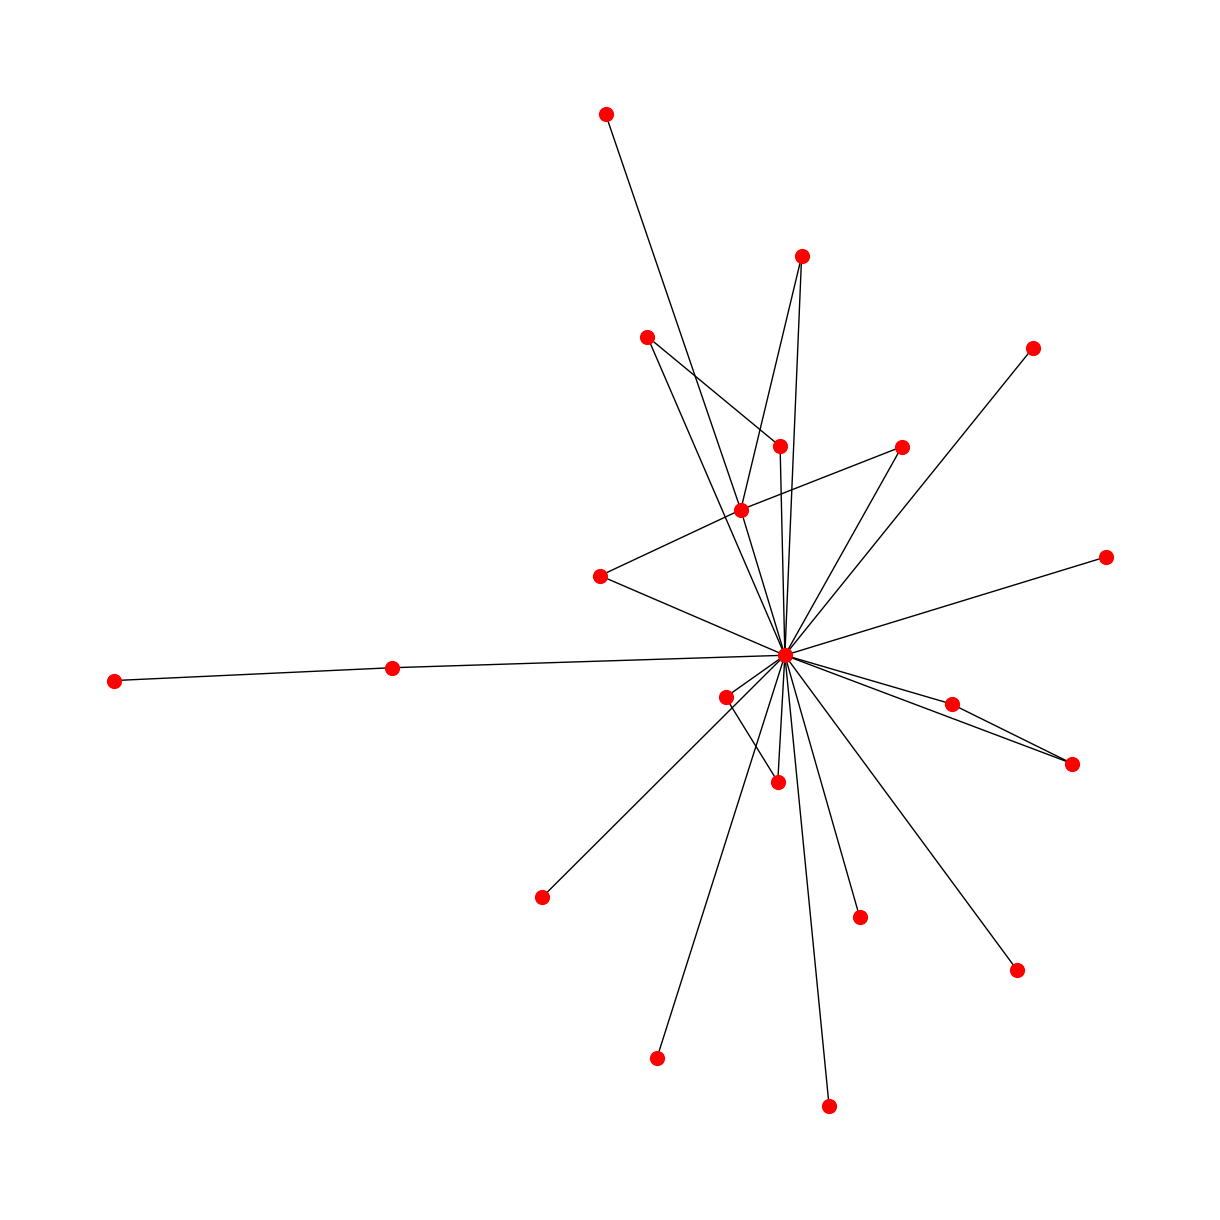

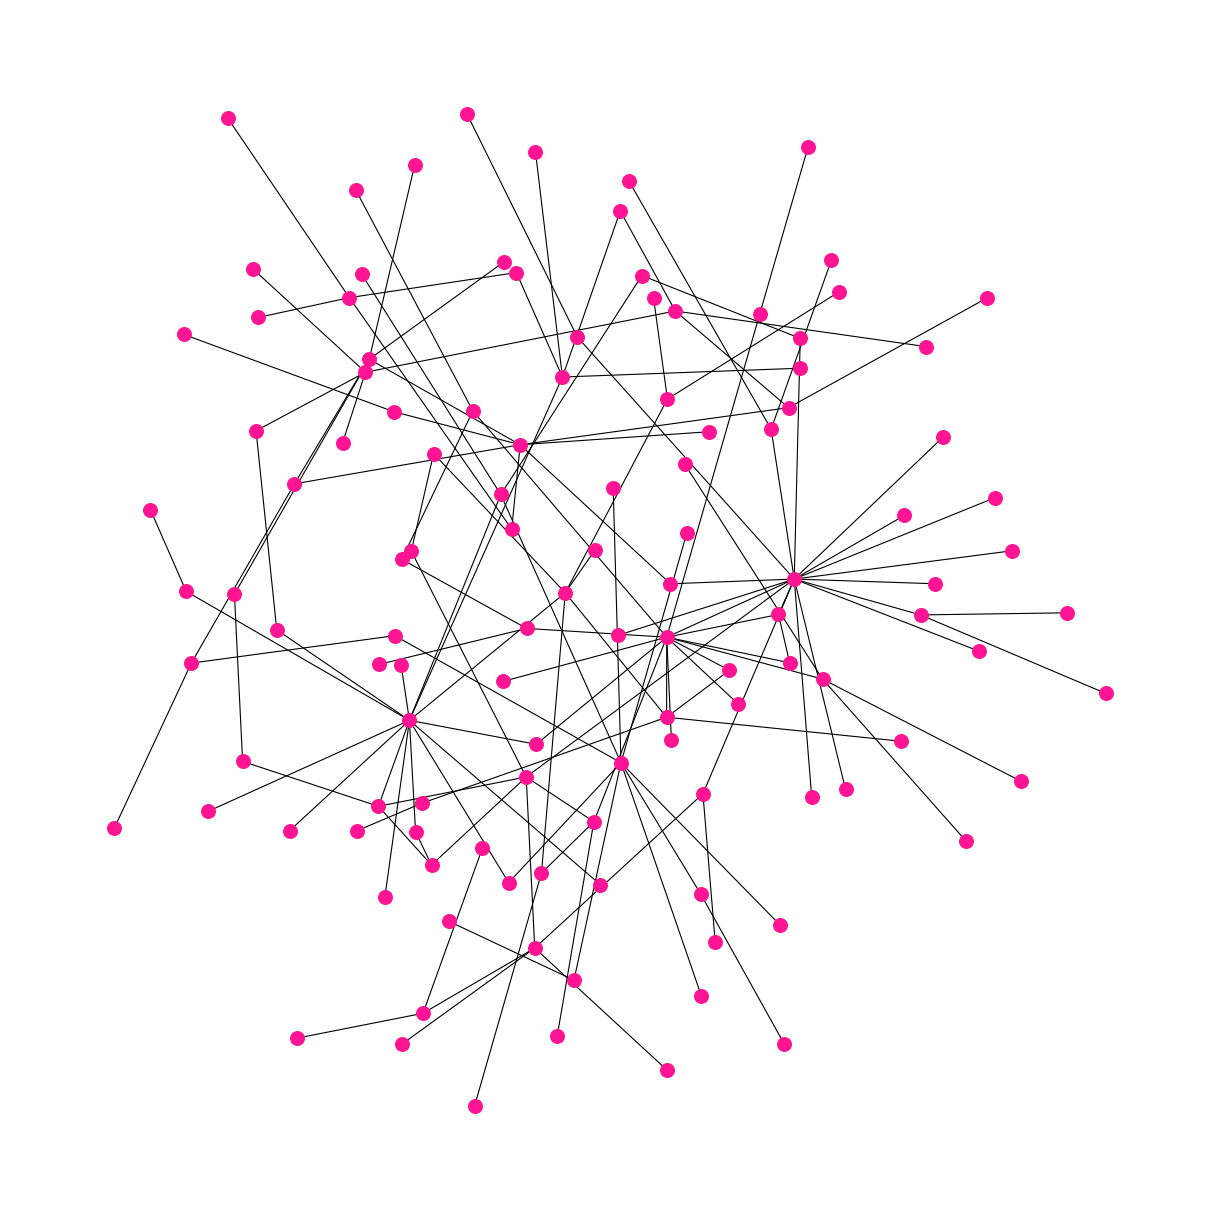

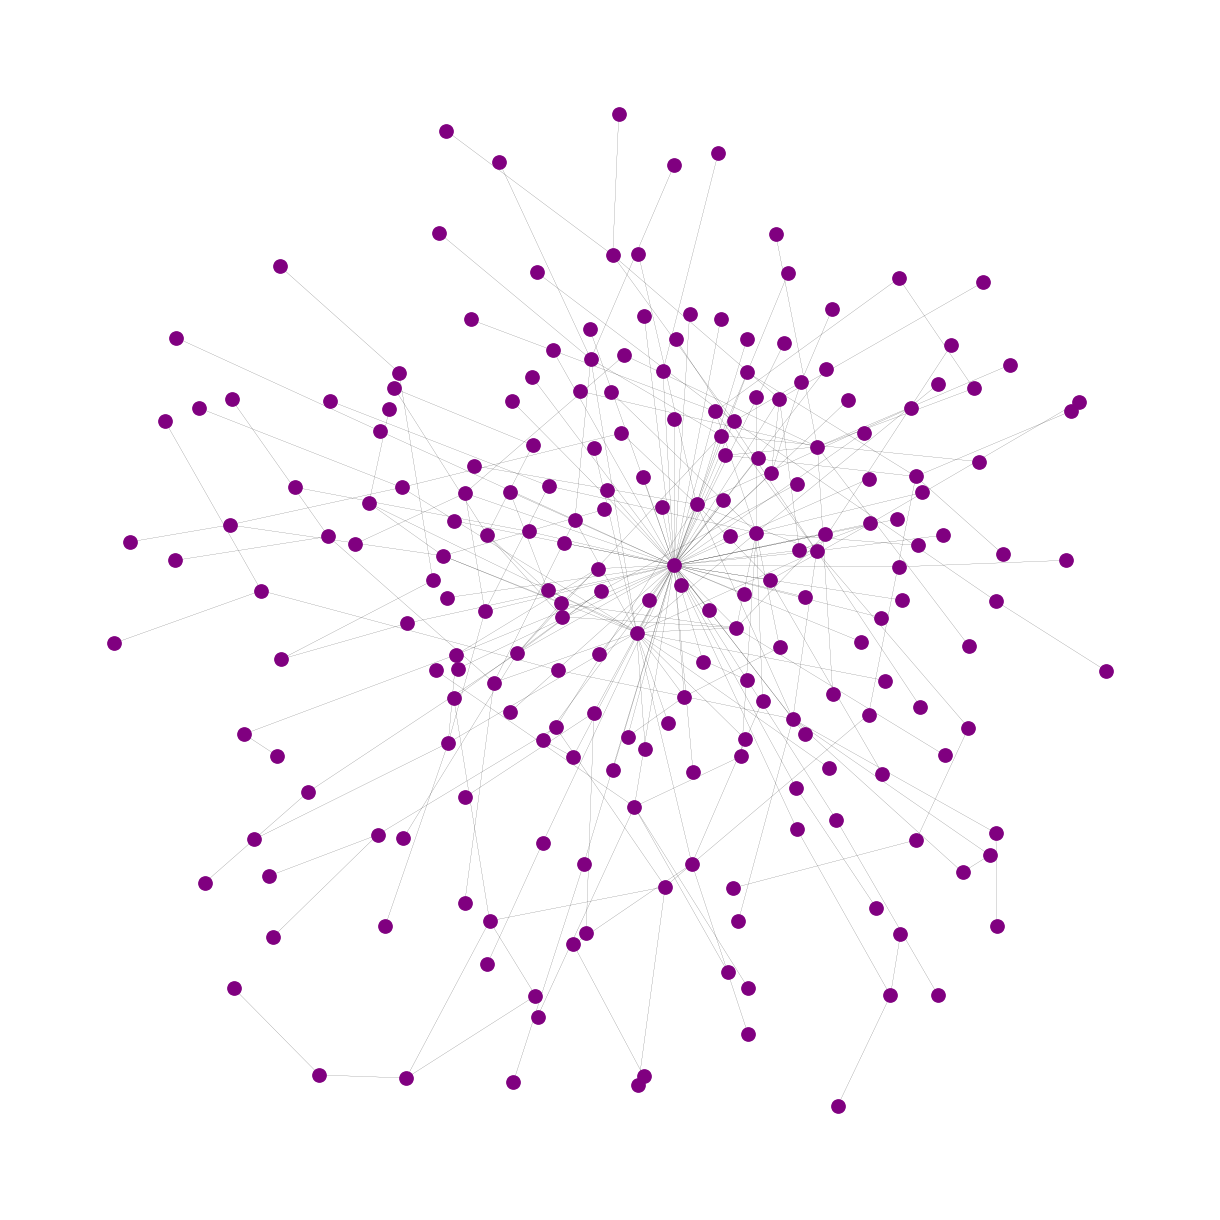

In [149]:
plot_G('indoorbouldering',color_dict['indoorbouldering'],size_dict['indoorbouldering'],0.1,0.7)
plot_G('jazznoir',color_dict['jazznoir'],size_dict['jazznoir'],0.1,1)
plot_G('Trump666',color_dict['Trump666'],size_dict['Trump666'],0.1,1)
plot_G('DTU',color_dict['DTU'],size_dict['DTU'],0.1,1)
plot_G('FourSentenceStories',color_dict['FourSentenceStories'],size_dict['FourSentenceStories'],1,1)
plot_G('GraphTheory',color_dict['GraphTheory'],size_dict['GraphTheory'],0.8,1)
plot_G('kiwi_bird',color_dict['kiwi_bird'],size_dict['kiwi_bird'],0.1,1)
print('Ez')

# WSB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graphviz

sample = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/comments_pmaw_2016-2021_wsb.csv',nrows=10)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])
dtype_dictionary['author'] = 'str'
dtype_dictionary['body'] = 'str'
dtype_dictionary['parent_id'] = 'str'
dtype_dictionary['link_id'] = 'str'
dtype_dictionary['id'] = 'str'

df_comments_chunked = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/comments_pmaw_2016-2021_wsb.csv', dtype=dtype_dictionary, 
    on_bad_lines='skip',
    chunksize=1000000,
    low_memory=False,
    usecols=['author','parent_author']
    )

df_comments = pd.concat(df_comments_chunked, ignore_index=True)

print('Done reading!'+'\n')

Done reading!



In [3]:
# G = nx.Graph()
# G.add_edges_from(df_comments[['author','parent_author']].dropna().values)
# G.remove_edges_from(nx.selfloop_edges(G))
# G = [G.subgraph(cc) for cc in nx.connected_components(G)][0]
# nx.write_edgelist(G,'edge_list.csv', data=False)

# load edge list with space delimiter
import networkx as nx
G = nx.read_edgelist('edge_list.csv', delimiter=' ', nodetype=str)

In [4]:
len(G.nodes)

1078648

In [5]:
# plot with graphviz
nx.nx_agraph.write_dot(G,'graph.dot')
graph = graphviz.Source.from_file('graph.dot')
# plot with sfdp
graph = nx.nx_agraph.to_agraph(G)
graph.layout('sfdp')
graph.draw('graph.png')

: 

: 